# Figures for ReadMe


In [6]:
# Standard library imports
import datetime
import os
from collections import deque
import time

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from datetime import datetime


# from sklearn.model_selection import train_test_split


from tqdm import tqdm

if os.path.exists('/workspace/data_2'):
    # Load the dictionary of DataFrames from the pickle
    data_path = '/workspace/data_2/'
else:
    data_path = '../data/'
    
# if torch.cuda.is_available() == False:
#     RuntimeError("GPU detected: False")
#     print("GPU detected: False")
# else:
#     device = torch.device("cuda")
#     print("The GPU is detected.")



### Load Data

In [8]:
dataset_df = pd.read_pickle(data_path + 'dataset_full.pkl')
# tournament_df = pd.read_pickle(data_path + 'top_8_tournament_previous_sets_and_results_with_winners_df')

Print out the columns using a loop for ease of reading.

In [9]:
for i, col in enumerate(dataset_df.columns):
    print(i, col)


0 key_x
1 game
2 tournament_key
3 winner_id
4 loser_id
5 p1_id
6 p2_id
7 p1_score
8 p2_score
9 valid_score
10 best_of
11 location_names
12 bracket_name
13 bracket_order
14 set_order
15 game_data
16 top_8
17 top_8_location_names
18 valid_top_8_bracket
19 top_8_bracket_location_names
20 major
21 key_y
22 start
23 end
24 start_week
25 p1_characters
26 p2_characters
27 p1_consistent
28 p2_consistent
29 matchup_strings
30 end_week
31 players_have_history
32 (p1/p2)_sorted
33 (p1/p2)_was_sorted
34 results_sorted
35 results
36 matchup_1
37 matchup_2
38 matchup_3
39 matchup_4
40 matchup_5
41 matchup_6
42 matchup_7
43 matchup_8
44 matchup_9
45 matchup_10
46 winner
47 p1_default_elo
48 p2_default_elo
49 p1_default_rd
50 p2_default_rd
51 p1_default_updates
52 p2_default_updates
53 start_index
54 start_date
55 p1_fox_count
56 p1_falco_count
57 p1_marth_count
58 p1_sheik_count
59 p1_captainfalcon_count
60 p1_jigglypuff_count
61 p1_peach_count
62 p1_luigi_count
63 p1_samus_count
64 p1_ganondorf_coun

In [10]:
features = dataset_df.columns[36:46].append(dataset_df.columns[47:53])
features = features.append(dataset_df.columns[55:])
target = 'winner'

df = dataset_df.dropna(subset=features)

## Histogram of all ELO
Histogram of the ELO of all sets played in 2023

In [11]:
sets_2023_df = dataset_df[(dataset_df['start']>datetime(2023,1,1)) & (dataset_df['start']<datetime(2024,1,1))]

In [ ]:
p1_default_elo = sets_2023_df[sets_2023_df['top_8']==False]['p1_default_elo']
p2_default_elo = sets_2023_df[sets_2023_df['top_8']==False]['p2_default_elo']
default_elo_non_top_8 = pd.Series([p1_default_elo, p2_default_elo])

p1_default_elo = sets_2023_df[sets_2023_df['top_8']==True]['p1_default_elo']
p2_default_elo = sets_2023_df[sets_2023_df['top_8']==True]['p2_default_elo']
default_elo_top_8 = pd.Series([p1_default_elo, p2_default_elo])

min = min(default_elo_non_top_8.min(), default_elo_top_8.min())
max = max(default_elo_non_top_8.max(), default_elo_top_8.max())


plt.figure(figsize=(12,8),dpi=100)
plt.hist(default_elo_non_top_8, bins=30, range=(min,max))
plt.hist(default_elo_top_8, bins=30, range=(min,max))
plt.show()

<Figure size 1200x800 with 0 Axes>

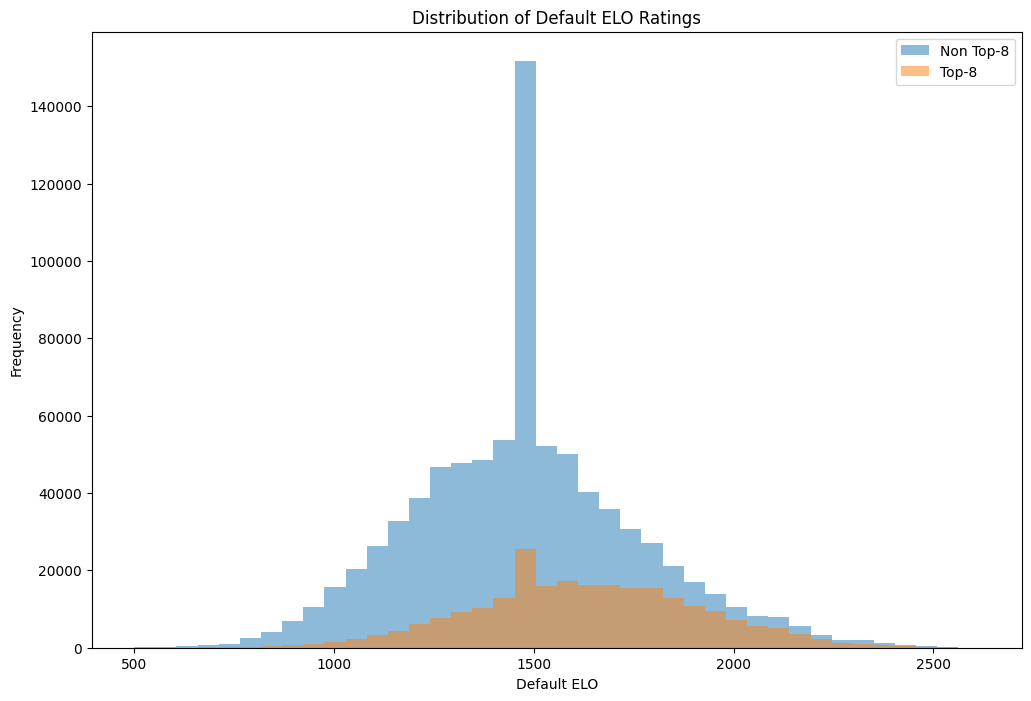

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract ELO values for non-top-8 players
p1_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p1_default_elo']
p2_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p2_default_elo']
default_elo_non_top_8 = pd.concat([p1_default_elo_non_top_8, p2_default_elo_non_top_8])
# default_elo_non_top_8 = default_elo_non_top_8[default_elo_non_top_8 != 1500]

# Extract ELO values for top-8 players
p1_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p1_default_elo']
p2_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p2_default_elo']
default_elo_top_8 = pd.concat([p1_default_elo_top_8, p2_default_elo_top_8])
# default_elo_top_8 = default_elo_top_8[default_elo_top_8 != 1500]

# Calculate the min and max values for binning
elo_min = min(default_elo_non_top_8.min(), default_elo_top_8.min())
elo_max = max(default_elo_non_top_8.max(), default_elo_top_8.max())

# Plot histograms
plt.figure(figsize=(12, 8), dpi=100)
plt.hist(default_elo_non_top_8, bins=40, range=(elo_min, elo_max), alpha=0.5, label="Non Top-8")
plt.hist(default_elo_top_8, bins=40, range=(elo_min, elo_max), alpha=0.5, label="Top-8")
plt.xlabel("Default ELO")
plt.ylabel("Frequency")
plt.title("Distribution of Default ELO Ratings")
plt.legend()
plt.show()

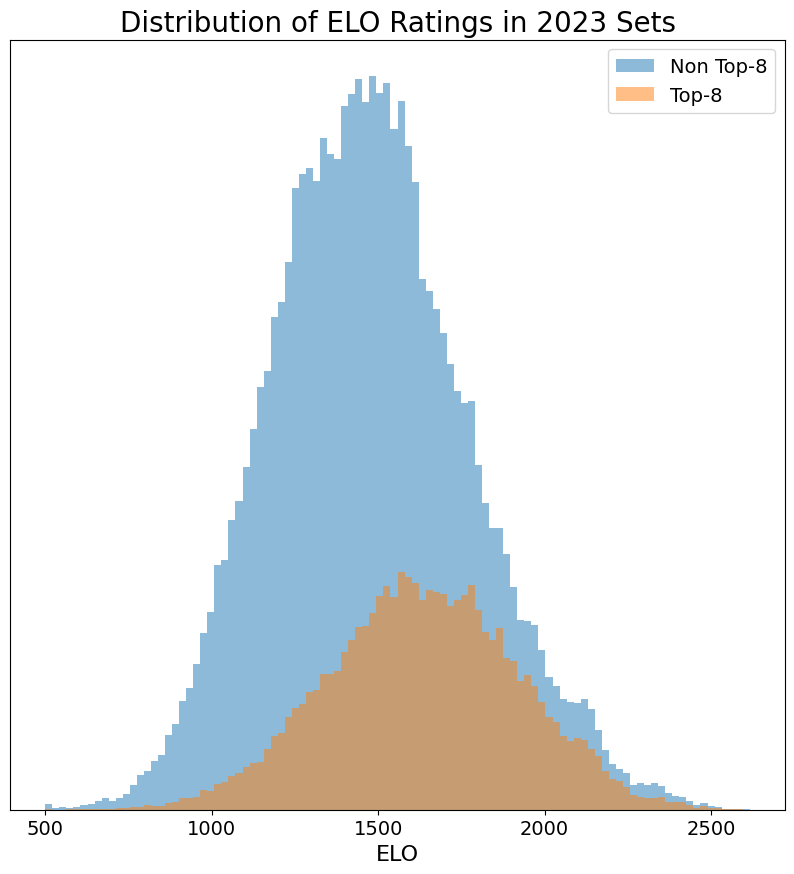

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract ELO values for non-top-8 players
p1_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p1_default_elo']
p2_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p2_default_elo']
default_elo_non_top_8 = pd.concat([p1_default_elo_non_top_8, p2_default_elo_non_top_8])
default_elo_non_top_8 = default_elo_non_top_8[default_elo_non_top_8 != 1500]

# Extract ELO values for top-8 players
p1_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p1_default_elo']
p2_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p2_default_elo']
default_elo_top_8 = pd.concat([p1_default_elo_top_8, p2_default_elo_top_8])
default_elo_top_8 = default_elo_top_8[default_elo_top_8 != 1500]

# Calculate the min and max values for binning
elo_min = min(default_elo_non_top_8.min(), default_elo_top_8.min())
elo_max = max(default_elo_non_top_8.max(), default_elo_top_8.max())

# Plot histograms
plt.figure(figsize=(10, 10), dpi=100)
bins = 100
plt.hist(default_elo_non_top_8, bins=bins, range=(elo_min, elo_max), alpha=0.5, label="Non Top-8")
plt.hist(default_elo_top_8, bins=bins, range=(elo_min, elo_max), alpha=0.5, label="Top-8")
plt.xlabel("ELO", fontsize=16)
plt.title("Distribution of ELO Ratings in 2023 Sets", fontsize=20)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)

# Remove y-axis ticks and label
plt.gca().axes.yaxis.set_visible(False)

plt.show()


/tmp/ipykernel_2057438/1646282788.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Category")


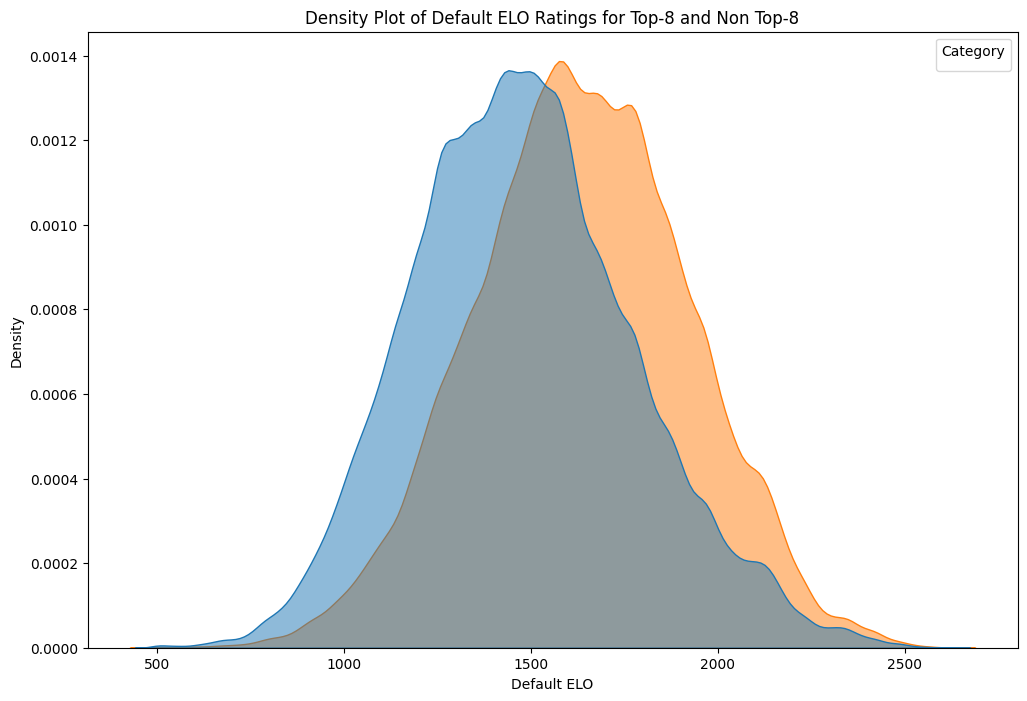

In [23]:
# Combine data into a single DataFrame for easier plotting with seaborn
default_elo_data = pd.DataFrame({
    'ELO': pd.concat([default_elo_non_top_8, default_elo_top_8]),
    'Category': ['Non Top-8'] * len(default_elo_non_top_8) + ['Top-8'] * len(default_elo_top_8)
})

# Plot with seaborn
plt.figure(figsize=(12, 8), dpi=100)
sns.kdeplot(data=default_elo_data, x="ELO", hue="Category", fill=True, common_norm=False, alpha=0.5)
plt.xlabel("Default ELO")
plt.ylabel("Density")
plt.title("Density Plot of Default ELO Ratings for Top-8 and Non Top-8")
plt.legend(title="Category")
plt.show()